# EDA


## 0 Описание Датасета

В данном датасете собрана информация о 8000 пользователях популярной стриминговой платформы Spotify за 2025г. О каждом из них была собрана индивидуальная статистика, характеризующая как их личную информацию (Страна, возраст, пол и др), так и их музыкальные привычки (Среднее время прослушивания музыки на платформе в день, тип устройства, тип подписки на сервис и др).

## 0 Постановка задачи

Для этого набора данных предстоит решить задачу классификации пользователей по ключевом параметру - покинул ли пользователь площадку или остается активным пользователем. Необходимо по вышеуказанному набору параметров принять решение и спрогнозировать будет ли пользователь продолжать использовать платформу, или в скором времени покинет ее.

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

### 1 Читаем данные

In [234]:
url = "https://raw.githubusercontent.com/Torcna/ML-practice-unn/main/spotify_churn_dataset.csv"
df = pd.read_csv(url, encoding="utf-8")
df.head(15)


user_id  gender  age country subscription_type  listening_time  \
0         1  Female   54      CA              Free              26   
1         2   Other   33      DE            Family             141   
2         3    Male   38      AU           Premium             199   
3         4  Female   22      CA           Student              36   
4         5   Other   29      US            Family             250   
5         6  Female   17      AU              Free             219   
6         7  Female   39      UK           Premium             289   
7         8  Female   41      UK              Free             210   
8         9   Other   55      DE           Student              50   
9        10    Male   44      DE              Free             278   
10       11   Other   33      DE              Free              86   
11       12   Other   24      CA              Free             113   
12       13  Female   37      IN            Family              24   
13       14  Female   53      US           Premium              45   
14       15   Other   37      IN            Family             114   

    songs_played_per_day  skip_rate device_type  ads_listened_per_week  \
0                     23       0.20     Desktop                     31   
1                     62       0.34         Web                      0   
2                     38       0.04      Mobile                      0   
3                      2       0.31      Mobile                      0   
4                     57       0.36      Mobile                      0   
5                     35       0.46     Desktop                     13   
6                     44       0.38     Desktop                      0   
7                     68       0.11      Mobile                      5   
8                     66       0.29         Web                      0   
9                     94       0.38      Mobile                     44   
10                    44       0.11         Web                     37   
11                    24       0.56     Desktop                     39   
12                    86       0.11     Desktop                      0   
13                    47       0.60         Web                      0   
14                    13       0.44         Web                      0   

    offline_listening  is_churned  
0                   0           1  
1                   1           0  
2                   1           1  
3                   1           0  
4                   1           1  
5                   0           0  
6                   1           0  
7                   0           0  
8                   1           0  
9                   0           0  
10                  0           0  
11                  0           1  
12                  1           0  
13                  1           0  
14                  1           1

Проверим из каких столбцов состоит наш датасет

In [235]:
print('Shape of dataset:', df.shape)
print('Columns in dataset:', df.columns.tolist())
df.info()

Shape of dataset: (8000, 12)
Columns in dataset: ['user_id', 'gender', 'age', 'country', 'subscription_type', 'listening_time', 'songs_played_per_day', 'skip_rate', 'device_type', 'ads_listened_per_week', 'offline_listening', 'is_churned']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8

Мы видим, что столбцы (признаки) имеют имена

- `user_id` - уникальный id пользователя (его можно сразу дропнуть)
- `gender` - пол - категориальный признак (мужчина, женщина или другой (мы такое не приветствуем))
- `age` - возраст
- `country` - страна - категориальный признак
- `subscription_type` - тип подписки - категориальный признак (студенческая, семейная, премиум или бесплатная)
- `listening_time` - время прослушивания в день в минутах
- `songs_played_per_day` - количество песен прослушанных за день
- `skip_rate` - частота скипа треков
- `device_type` - тип клиента с которого прослушивались треки (веб-клиент, мобильное устройство, приложение для PC или мобильное приложение)
- `ads_listened_per_week` - число рекламных интеграций, показанных пользователю за неделлю
- `offline_listening` - Изпользовал ли пользователь возможность оффлайн прослушивания песен
- `is_churned` - ключевой параметр - является ли пользователь активным



## 2 Разделение на обучающую и тестовую выборку



In [236]:
y = df['is_churned'].astype(int)
X = df.drop(columns=['is_churned', 'user_id'])

num_cols = ['age','listening_time','songs_played_per_day','skip_rate','ads_listened_per_week']
cat_cols = ['gender','country','subscription_type','device_type']
bin_cols = ['offline_listening']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## 3 Определим основные метрики нашего датасета

In [237]:
X_train.describe()

age  listening_time  songs_played_per_day    skip_rate  \
count  6400.000000     6400.000000           6400.000000  6400.000000   
mean     37.702344      153.704062             49.962656     0.300339   
std      12.700611       83.948879             28.399716     0.173761   
min      16.000000       10.000000              1.000000     0.000000   
25%      27.000000       81.000000             25.000000     0.150000   
50%      38.000000      153.000000             50.000000     0.300000   
75%      49.000000      226.000000             75.000000     0.450000   
max      59.000000      299.000000             99.000000     0.600000   

       ads_listened_per_week  offline_listening  
count            6400.000000        6400.000000  
mean                6.975000           0.746563  
std                13.657625           0.435013  
min                 0.000000           0.000000  
25%                 0.000000           0.000000  
50%                 0.000000           1.000000  
75%                 5.000000           1.000000  
max                49.000000           1.000000

Посмотрим на категориальные признаки

In [238]:
for col in cat_cols:
  X_train[col] = X_train[col].astype('category')
X_train.describe(include=['category'])


gender country subscription_type device_type
count    6400    6400              6400        6400
unique      3       8                 4           3
top      Male      IN           Premium     Desktop
freq     2160     823              1680        2207

### Визуализируем основные характеристики

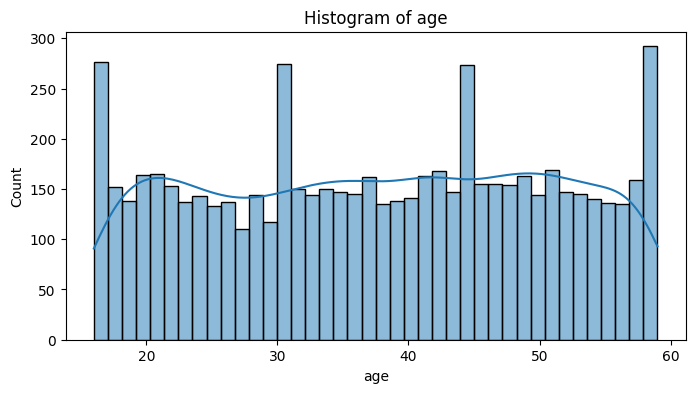

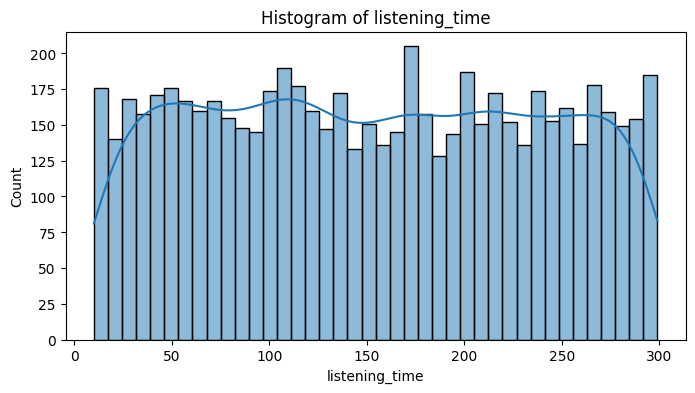

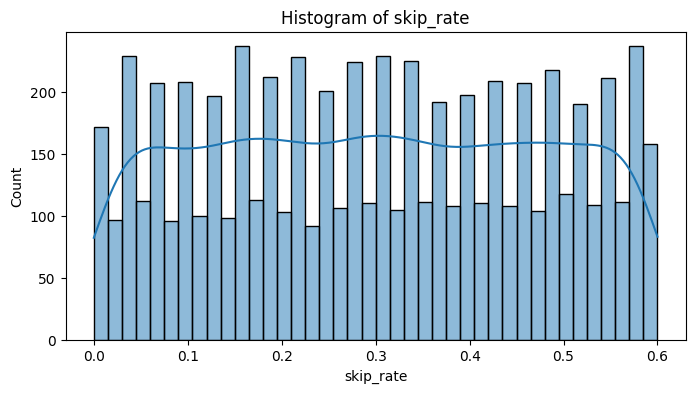

In [239]:
import matplotlib.pyplot as plt

import seaborn as sns

features_to_hist = ['age', 'listening_time', 'skip_rate']
for feature in features_to_hist:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_train[feature], kde=True, bins=40)
    plt.title(f'Histogram of {feature}')
    plt.show()

 Для категориальных признаков построим отдельные диаграммы

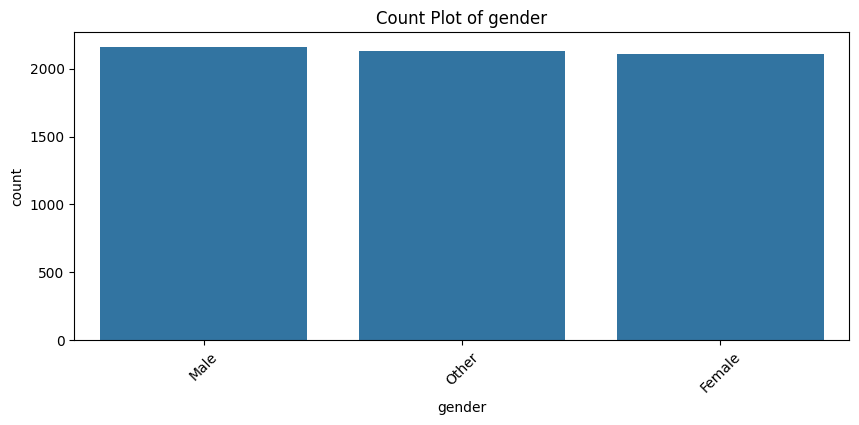

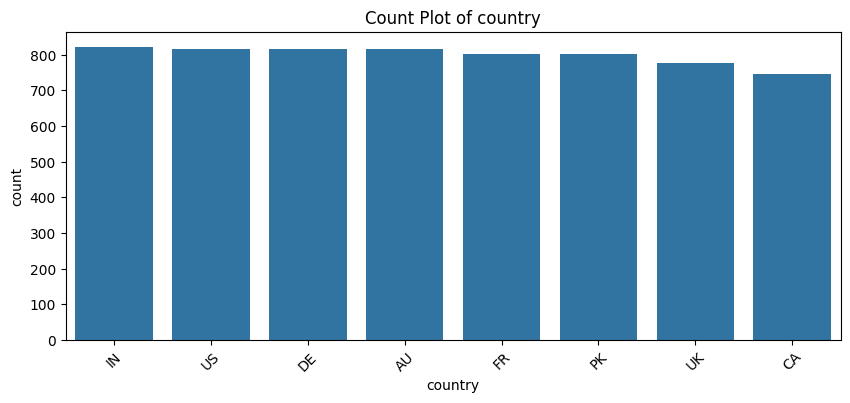

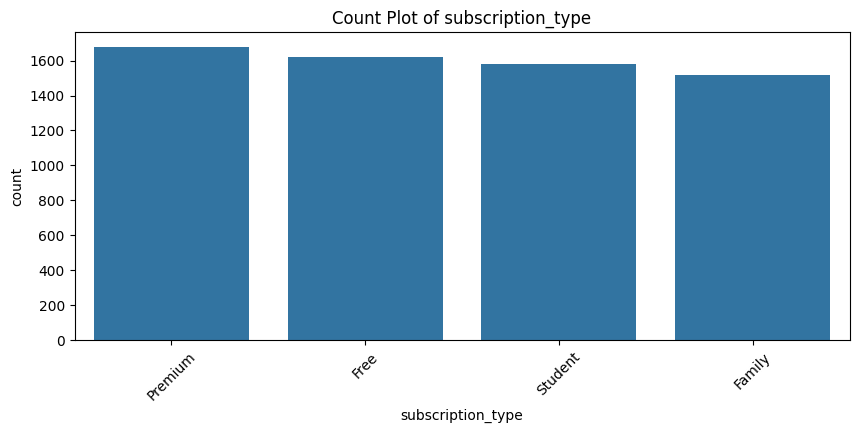

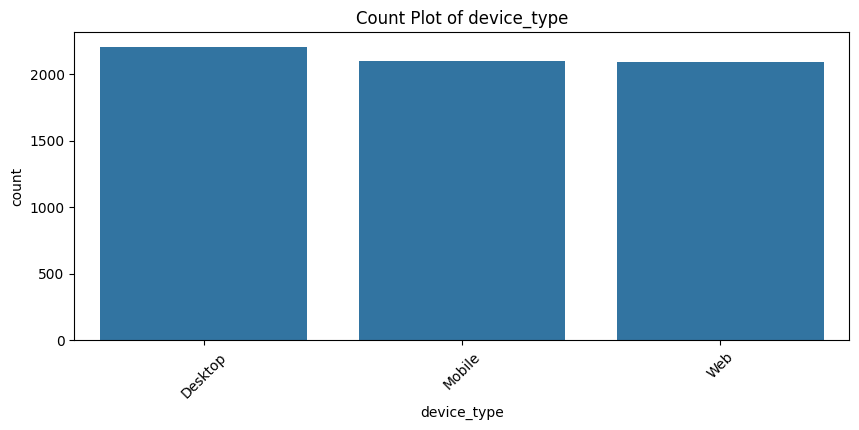

In [240]:
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=X_train, x=col, order=X_train[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

надо добить скаттер матрицу и пару дианграмм и написать вывод все

Построим несколько диаграмм рассеивания

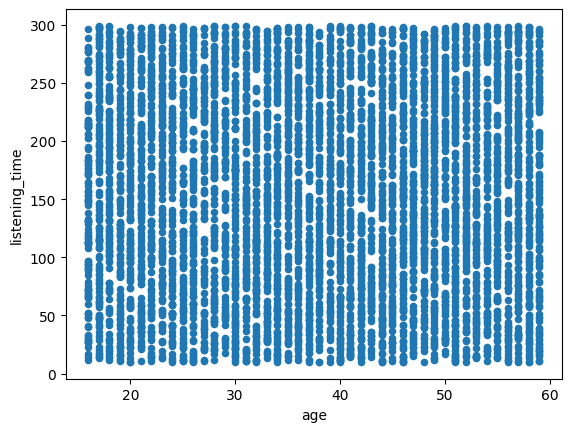

In [241]:
X_train.plot(kind='scatter', x='age', y='listening_time')
pass

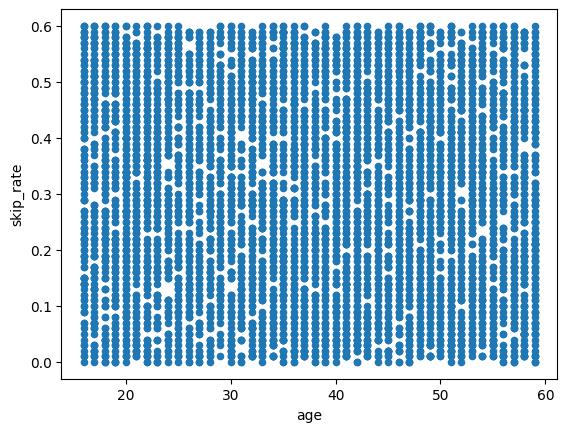

In [242]:
X_train.plot(kind='scatter', x='age', y='skip_rate')
pass

In [243]:
X_train['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    16.0
0.010    16.0
0.050    18.0
0.100    20.0
0.500    38.0
0.900    55.0
0.950    57.0
0.990    59.0
0.995    59.0
Name: age, dtype: float64

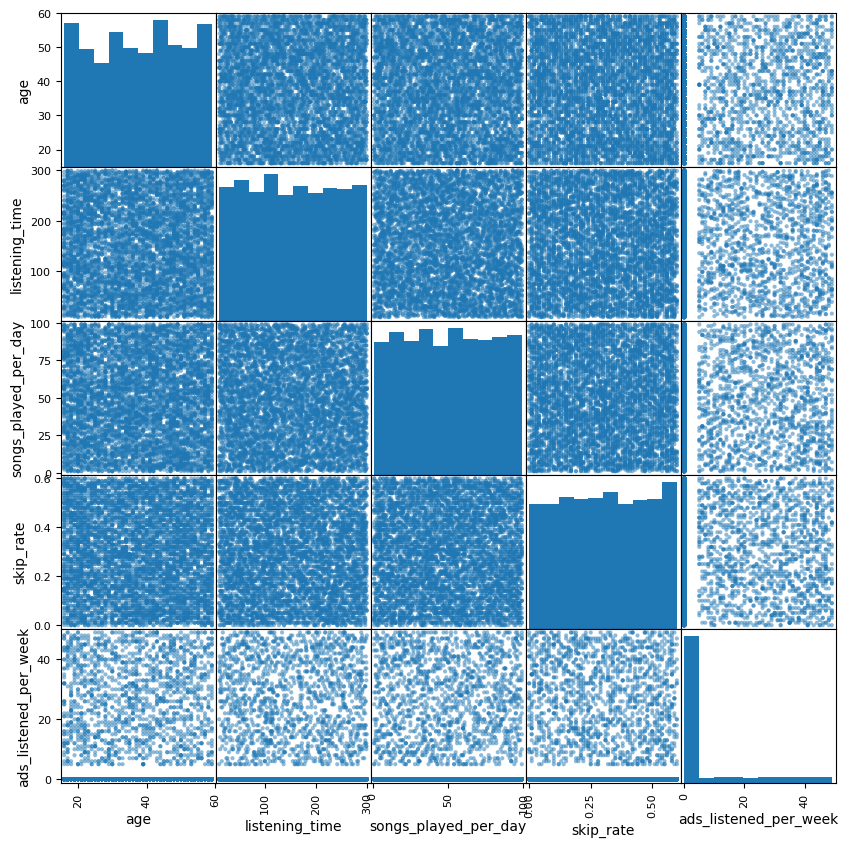

In [244]:
X_train_numeric_features = X_train[num_cols]
pd.plotting.scatter_matrix(X_train_numeric_features, figsize = (10, 10))
pass

Построим для некоторых параметров диаграммы "ящик с усами" для того, чтобы удостовериться, что данные сбалансированы и нормализованы, значимых выбросов, которые могут повлиять на работу классификатора, нет.

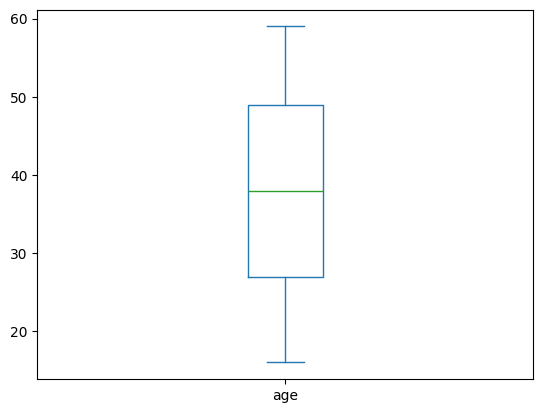

In [245]:
X_train['age'].plot(kind='box')
pass

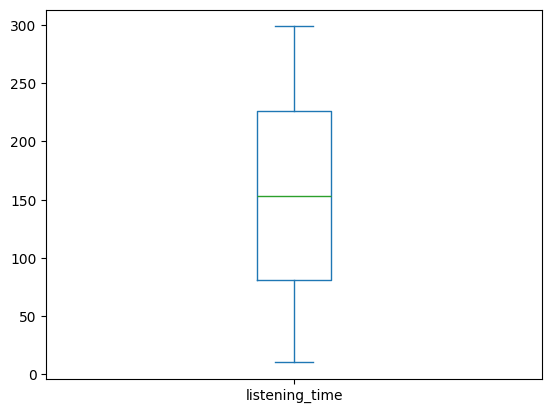

In [246]:
X_train['listening_time'].plot(kind='box')
pass

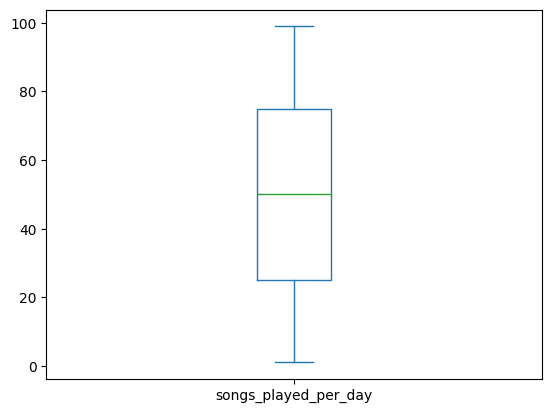

In [247]:
X_train['songs_played_per_day'].plot(kind='box')
pass

Churn Rate (%):
is_churned
0    74.1125
1    25.8875
Name: proportion, dtype: float64


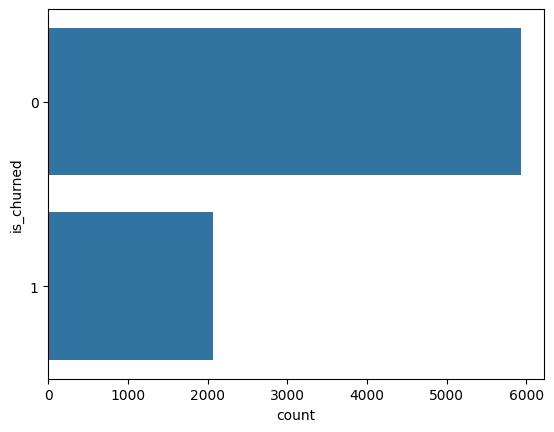

In [248]:
sns.countplot(y='is_churned', data=df)
churn_rate = df["is_churned"].value_counts(normalize=True) * 100
print("Churn Rate (%):")
print(churn_rate)

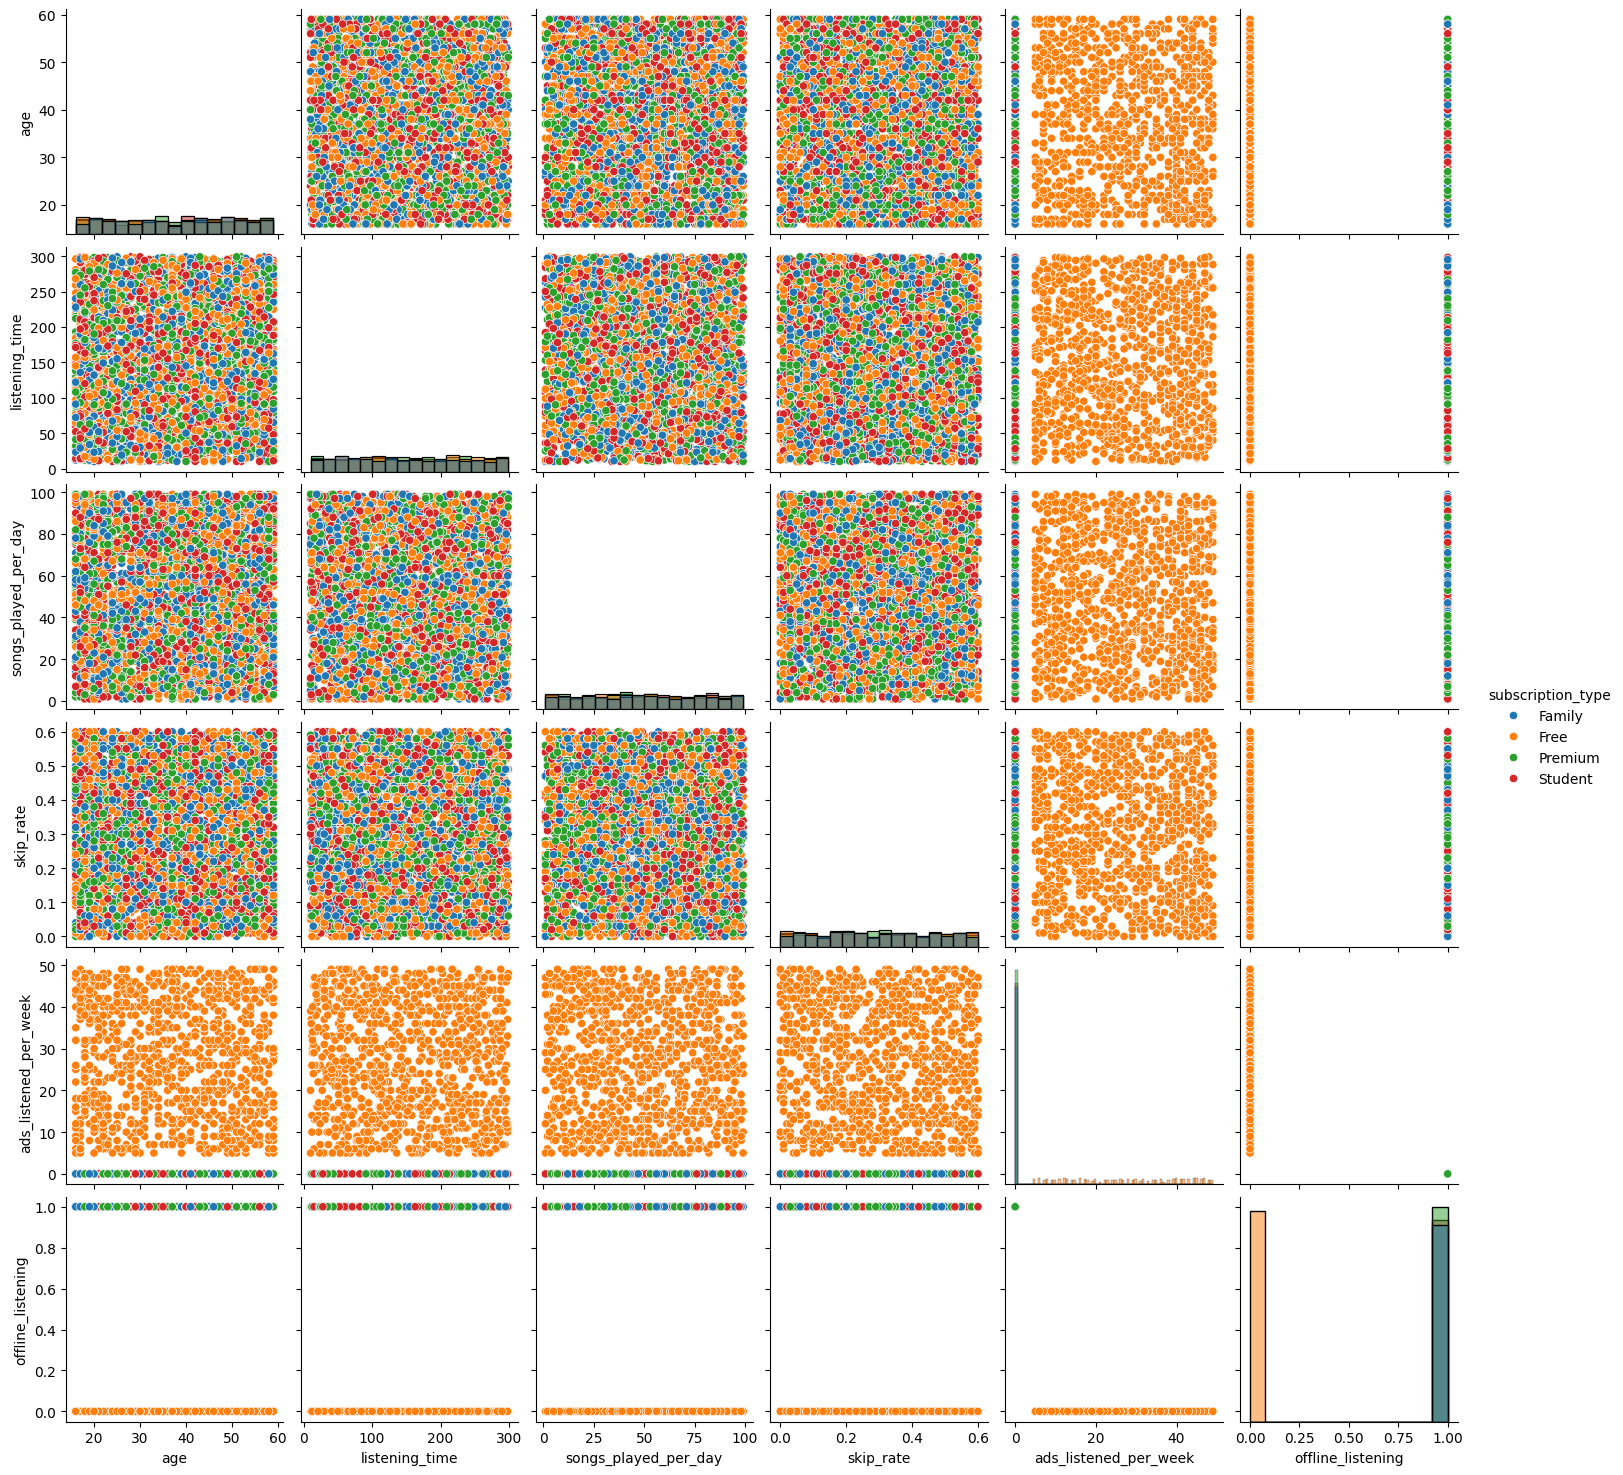

In [249]:
sns.pairplot(X_train.sample(4000), hue='subscription_type', diag_kind='hist')
pass

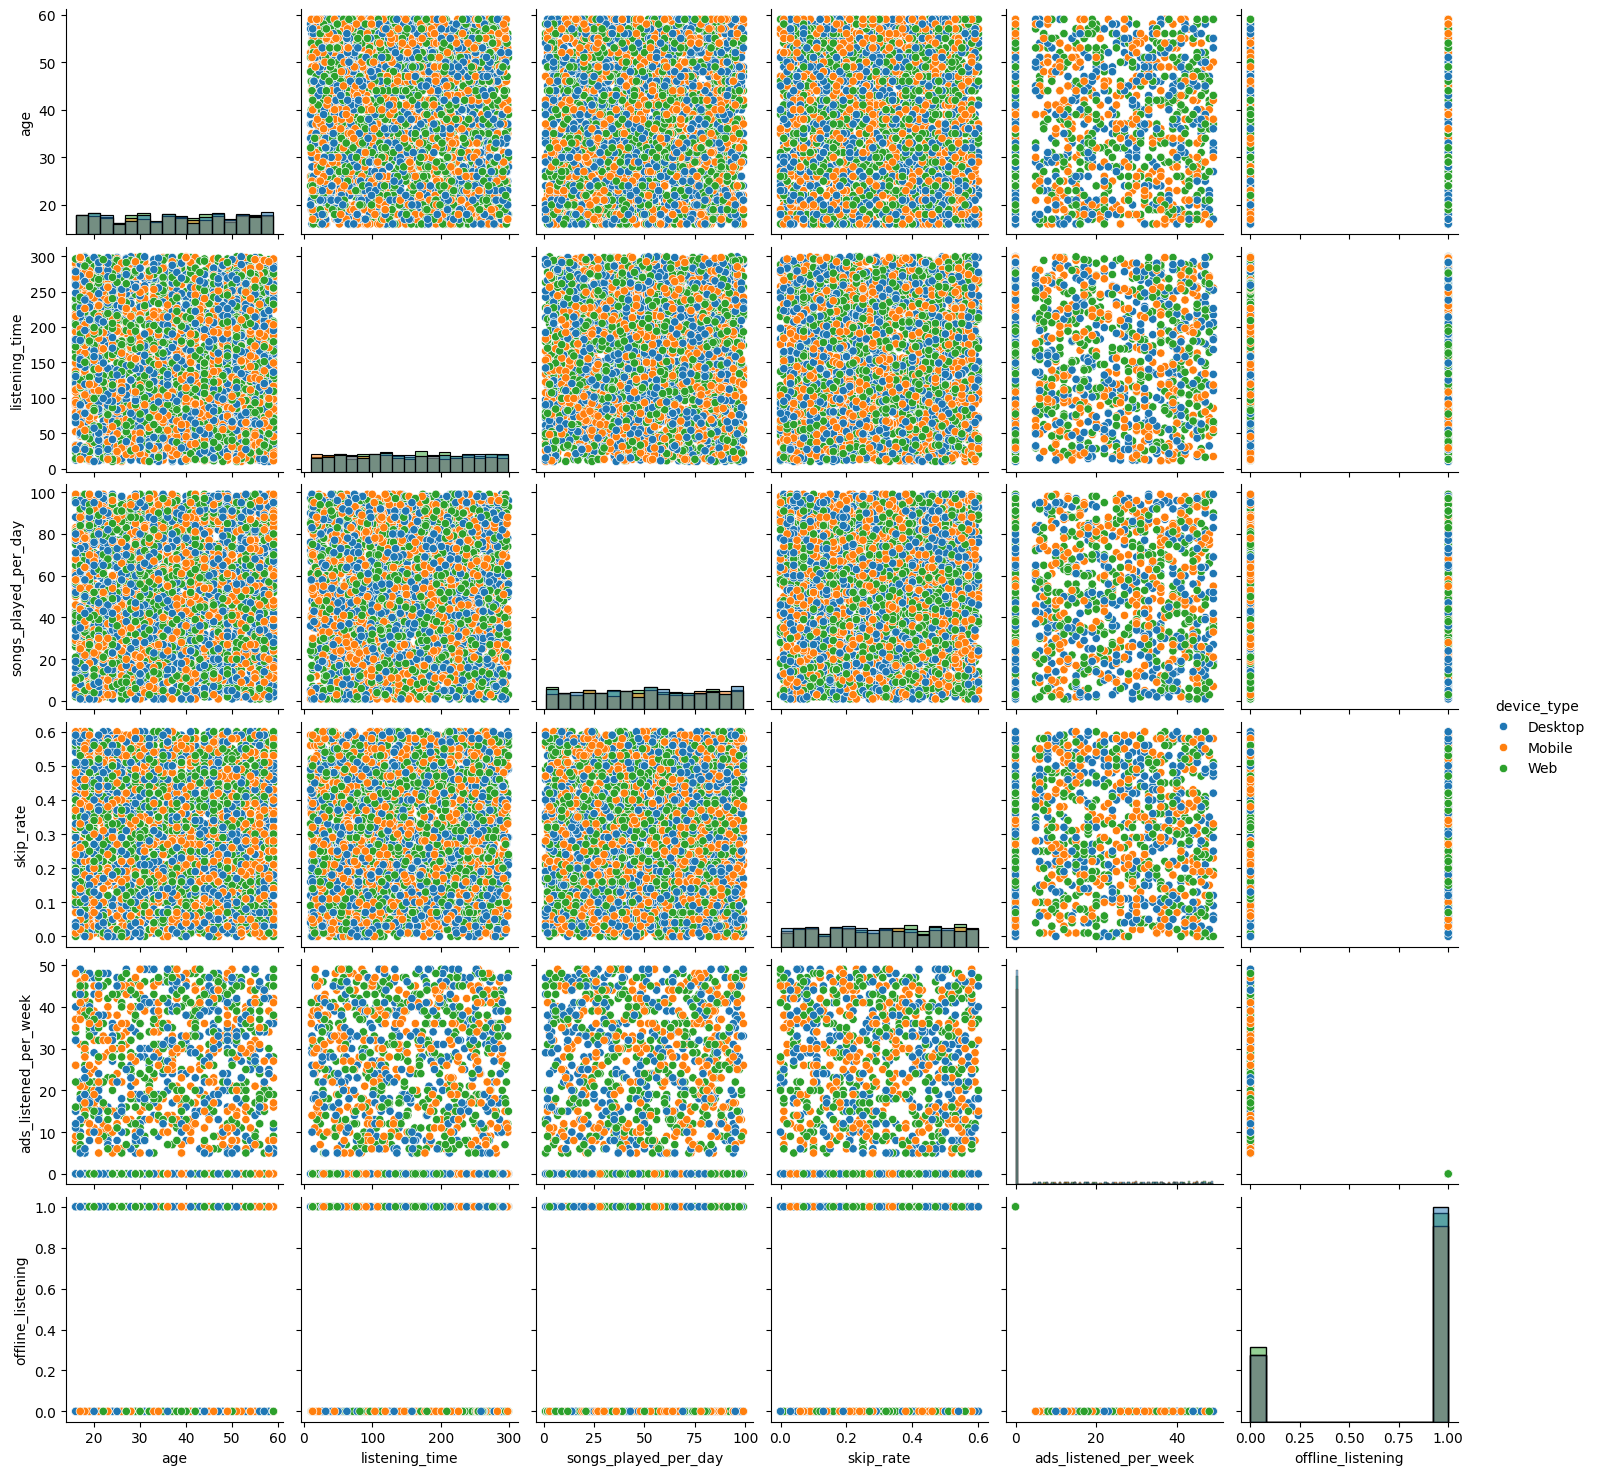

In [250]:
sns.pairplot(X_train.sample(4000), hue='device_type', diag_kind='hist')
pass

Для числовых параметров построим матрицу корреляции, чтобы установить связь между ними

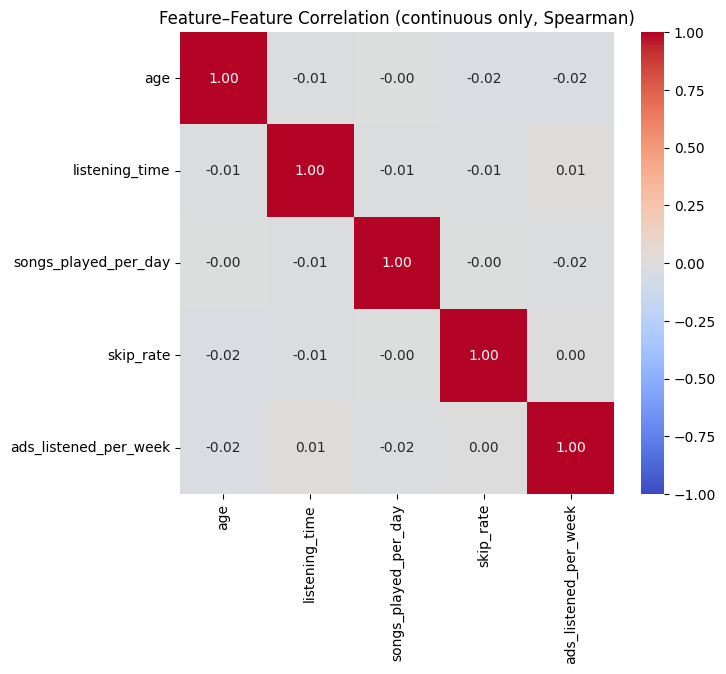

In [251]:
corr_ff = X_train[num_cols].corr(method='spearman')
plt.figure(figsize=(7, 6))
sns.heatmap(corr_ff, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature–Feature Correlation (continuous only, Spearman)')
plt.show()

Дополнительно проверим связь каждой из них с нашим таргетом напрямую - `is_churned`

In [252]:
from scipy.stats import spearmanr

rows = []
for col in num_cols:
    r, p = spearmanr(X_train[col], y_train)
    rows.append({'feature': col, 'spearman_to_target': r, 'p_value': p})

corr_to_target = pd.DataFrame(rows).sort_values('spearman_to_target', key=np.abs, ascending=False)
corr_to_target

feature  spearman_to_target   p_value
2   songs_played_per_day            0.023801  0.056912
3              skip_rate            0.015004  0.230071
1         listening_time           -0.013461  0.281620
4  ads_listened_per_week           -0.007909  0.526984
0                    age            0.007419  0.552917

### Вывод и интерпретация

На основе построенных диаграмм и собранных метрик можно сделать вывод, что представленный датасет является довольно сбалансированным. по матрице корреляции можно увидеть, что нет конкретного параметра, который действительно влияет на поле `is_churned`, в таких задачах о покупательском поведении довольно часто на конечный результат влияет именно совокупность характеристик, а не какой-то конкретный параметр.

 Выбросы и аномальные значения практически не встречаются, данные о пользователях различных возрастов, полов и стран подобраны равномерно и теперь можно приступить к обработке категориальных и пропущенных признаков.

### 4 Пропущенные данные

Можем убедиться, что пропущенных данных в нашем датасете нет

In [253]:
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64


## 5 Категориальные значения

Векторизируем категориальные значения для столбцов `gender`, `subscription_type`, `device_type`, `country`

In [254]:
X_train_ = pd.get_dummies(X_train, columns=cat_cols, drop_first=True, dtype=int)
X_test_  = pd.get_dummies(X_test, columns=cat_cols, drop_first=True, dtype=int)

X_train_.head(5)

age  listening_time  songs_played_per_day  skip_rate  \
4661   48             138                    38       0.59   
5195   44              78                    36       0.16   
7123   29              90                    75       0.52   
3764   56             115                    41       0.20   
6824   32             105                    17       0.17   

      ads_listened_per_week  offline_listening  gender_Male  gender_Other  \
4661                      0                  1            0             1   
5195                      0                  1            1             0   
7123                     16                  0            1             0   
3764                      0                  1            1             0   
6824                      0                  1            0             1   

      country_CA  country_DE  country_FR  country_IN  country_PK  country_UK  \
4661           0           0           0           0           0           0   
5195           0           0           0           0           0           0   
7123           0           0           0           0           1           0   
3764           0           0           0           0           1           0   
6824           0           0           0           0           0           1   

      country_US  subscription_type_Free  subscription_type_Premium  \
4661           1                       0                          0   
5195           1                       0                          1   
7123           0                       1                          0   
3764           0                       0                          0   
6824           0                       0                          0   

      subscription_type_Student  device_type_Mobile  device_type_Web  
4661                          1                   0                0  
5195                          0                   0                1  
7123                          0                   0                1  
3764                          1                   1                0  
6824                          0                   0                1

## 6 Нормализация

Проведем нормализацию числовых параметров

In [255]:
scaler = StandardScaler()
scaler.fit(X_train_[num_cols])

X_train_[num_cols] = scaler.transform(X_train_[num_cols])
X_test_[num_cols]  = scaler.transform(X_test_[num_cols])

X_train_.tail(5)

age  listening_time  songs_played_per_day  skip_rate  \
5178  1.125834       -0.484905             -0.526901  -0.404835   
384   1.204576        0.396653             -0.808616  -1.095492   
1468 -1.078957        0.742128             -0.350829   0.573596   
4335 -0.763987       -1.080552              1.128175  -0.750163   
4640 -0.763987       -1.521331             -0.491686   0.976480   

      ads_listened_per_week  offline_listening  gender_Male  gender_Other  \
5178              -0.510744                  1            0             1   
384               -0.510744                  1            0             0   
1468              -0.510744                  1            0             1   
4335              -0.510744                  1            0             1   
4640               2.052128                  0            0             1   

      country_CA  country_DE  country_FR  country_IN  country_PK  country_UK  \
5178           0           0           1           0           0           0   
384            0           0           0           0           1           0   
1468           0           0           0           1           0           0   
4335           0           0           0           0           0           1   
4640           0           0           0           0           0           0   

      country_US  subscription_type_Free  subscription_type_Premium  \
5178           0                       0                          0   
384            0                       0                          0   
1468           0                       0                          1   
4335           0                       0                          0   
4640           0                       1                          0   

      subscription_type_Student  device_type_Mobile  device_type_Web  
5178                          1                   0                0  
384                           0                   0                0  
1468                          0                   0                1  
4335                          1                   0                0  
4640                          0                   0                0

## 7 Запуск классификатора

In [256]:

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_, y_train)

y_pred_knn = knn.predict(X_test_)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.68625

Confusion Matrix:
 [[1040  146]
 [ 356   58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.81      1186
           1       0.28      0.14      0.19       414

    accuracy                           0.69      1600
   macro avg       0.51      0.51      0.50      1600
weighted avg       0.63      0.69      0.65      1600



## 8 Анализ и подбор гиперпараметров



In [257]:
results = []

best = {"k": None, "acc": -1, "y_pred": None}

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_, y_train)
    y_pred = knn.predict(X_test_)
    acc = accuracy_score(y_test, y_pred)
    results.append((k, acc))
    if acc > best["acc"]:
        best = {"k": k, "acc": acc, "y_pred": y_pred}

print("Per-k accuracy:", results)
print(f"\nBest k = {best['k']}  |  Accuracy = {best['acc']:.4f}")

print("\nConfusion Matrix (best k):\n", confusion_matrix(y_test, best["y_pred"]))
print("\nClassification Report (best k):\n", classification_report(y_test, best["y_pred"], digits=3))

Per-k accuracy: [(1, 0.629375), (2, 0.715), (3, 0.668125), (4, 0.711875), (5, 0.68625), (6, 0.728125), (7, 0.70875), (8, 0.728125), (9, 0.71875), (10, 0.73), (11, 0.725), (12, 0.73125), (13, 0.7225), (14, 0.73125), (15, 0.72875)]

Best k = 12  |  Accuracy = 0.7312

Confusion Matrix (best k):
 [[1162   24]
 [ 406    8]]

Classification Report (best k):
               precision    recall  f1-score   support

           0      0.741     0.980     0.844      1186
           1      0.250     0.019     0.036       414

    accuracy                          0.731      1600
   macro avg      0.496     0.500     0.440      1600
weighted avg      0.614     0.731     0.635      1600



Использовав метод k-ближайших соседей мы получили, что модель с намного большей точностью может сказать, что пользователь остался на платформе, в то вермя, как ушедших пользователей мы определяем с очень большой ошибкой. А также можно сделать вывод о том, что значение гиперпараметра K=12  является оптимальным

## 12 Общие выводы

При использовании классификатора k=12 Ближайших Соседей явно обнаружилась большая разница в точности предсказания для разных классов. Причиной такого разброса может быть несбалансированность target, по результату видно, что точности очень похожи на процентное соотношение `is_churned` по двум классам. Также стоит отметить, что метод k-Ближайших Соседей может плохо подходить для залач, где между features нет корреляции (или даже она отрицательна, как в нашем случае). В будущем предполагается поработать с другими классификаторами и попробовать исправить несбалансированность данных.